<h1 style="color:rgb(0,120,170)">k-nearest neighbors</h1>

<h2 style="color:rgb(0,120,170)">Task 1: Visualization</h2>

In [45]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt

In [46]:
# read data, split into X(features) and y(labels)
Z = np.genfromtxt('DataSet1.csv', delimiter=';')
X, y = Z[:,:-1], Z[:,-1]

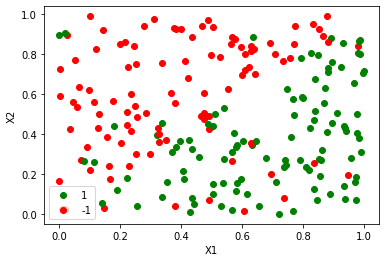

In [47]:
# your code goes here ↓↓

for i,elem in enumerate(X):
    if y[i] == -1:
        plt.scatter(elem[0], elem[1], c='r')
    if y[i] == 1:
        plt.scatter(elem[0], elem[1], c='g')

plt.xlabel("X1")
plt.ylabel("X2")


plt.legend(['1','-1'])
plt.show()


In [50]:
from sklearn.model_selection import KFold
from sklearn import neighbors


In [51]:
"""
Function that fits a kNN to given data
@param X_train, np array, training data
@param y_train, np array, training labels
@param k_train, integer, k for the kNN

@output classifier, kNN instance, classifier that was fitted to training data
"""
def train_kNN(X_train,y_train,k_train): 
    #X - FEATURES
    #y - labels
    classifier = neighbors.KNeighborsClassifier(n_neighbors=k_train)
    classifier = classifier.fit(X_train,y_train)
    return classifier 

#train_kNN(X,y,10)

In [52]:
"""
Function that returns predictions for some input data
@param classifier, kNN instance, trained kNN classifier
@param X_eval, np array, data that you want to predict the labels for

@output predicitons, np array, predicted labels
"""
def eval_kNN(classifier, X_eval): 
    #your code goes here ↓↓↓
    predictions = classifier.predict(X_eval)
    return predictions
#predictions = eval_kNN(train_kNN(X,y,1), X)


In [53]:
"""
Function that calculates the mean zero-one loss for given true and predicted labels
@param y_true, np array, true labels
@param y_pred, np array, predicted labels

@output loss, float, mean zero-one loss
"""
def mean_zero_one_loss(y_true, y_pred):
    #your code goes here ↓↓↓
    #loss = sklearn.metrics.zero_one_loss(y_true, y_pred)
    loss = 0
    for i,true in enumerate(y_true):
        if true != y_pred[i]:
            loss += 1
    loss = loss/len(y_pred)
    return loss

#mean_zero_one_loss(y,predictions)

In [54]:
"""
Function that combines all functions using CV
@param X, np array, training data
@param y, np array, training labels
@param nf, integer, number of folds for CV
@param k, integer, k for kNN

@output mean_error, float, mean error over all folds
"""
def run_kNN(X,y,nf,k):
    #your code goes here ↓↓↓
    scores = []
    errors = []
    kf = KFold(n_splits=nf)
    KFold(n_splits=nf, random_state=None, shuffle=False)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        classifier = train_kNN(X_train,y_train,k)
        scores.append(classifier.score(X_test,y_test))
        predictions = eval_kNN(classifier,X_test)
        errors.append(mean_zero_one_loss(y_test,predictions))   
    return np.mean(errors)

#run_kNN(X,y,10,3)

In [55]:

m = 179
nf = 10
error_holder = []
for k in range(1,m+1,2): #range with 179 included and step of 2
    error_holder.append(run_kNN(X,y,nf,k))

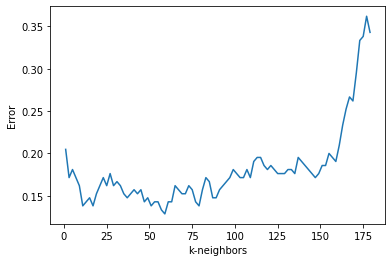

In [56]:

k = [k for k in range(1,179+1,2)]
plt.xlabel('k-neighbors')
plt.ylabel('Error')
plt.plot(k,error_holder)
plt.show()

In [59]:
"""
Function that produces a flip vector consisting of -1's and 1's (1/6,5/6)
@param n, integer, the length of the vector that should be returned

@output flip_vector, np array, the vector that indicates what labels will be flipped
"""
def generate_flip_vector(n):
    #your code goes here ↓↓↓
    flip_vector = []
    for i in range(n//6):
        flip_vector.append(-1)
    for i in range(n-n//6):
        flip_vector.append(1)
    np.random.shuffle(flip_vector)
    return np.asarray(flip_vector)


In [60]:
"""
Function that flips labels given a flip vector
@param y, np array, labels to flip (don't forget to copy the data in order not to alter the original labels)
@param flip_vector, np array, array that should be used to flip the labels

@output flipped_labels, np array, the labels where 1//6 labels are flipped
"""
def flip_labels(y,flip_vector):
    flipped_labels = y.copy()
    end_idx = len(y)//6
    for i in range(end_idx):
        flipped_labels[i] *= flip_vector[i]
    return np.asarray(flipped_labels)


In [61]:

fl_vec = generate_flip_vector(len(y))
y_fl = flip_labels(y,fl_vec)
error_holder_flipped = []
for k in range(1,m+1,2): #range with 179 included and step of 2
    error_holder_flipped.append(run_kNN(X,y_fl,nf,k))

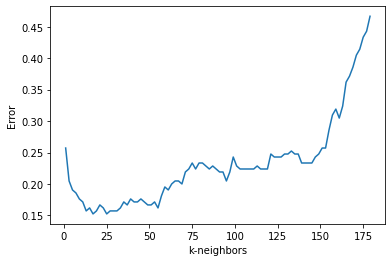

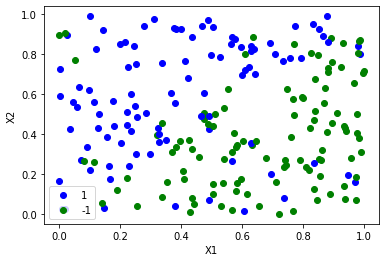

In [62]:

k = [k for k in range(1,179+1,2)]
plt.xlabel('k-neighbors')
plt.ylabel('Error')
plt.plot(k,error_holder_flipped)
plt.show()

for i,elem in enumerate(X):
    if y_fl[i] == -1:
        plt.scatter(elem[0], elem[1], c='b')
    if y_fl[i] == 1:
        plt.scatter(elem[0], elem[1], c='g')

plt.xlabel("X1")
plt.ylabel("X2")
plt.legend(['1','-1'])
plt.show()

In [64]:
"""
Function that adds random features to dataset
@param X, np array, dataset

@output X_new, np array, dataset enhanced with 4 random features
"""
def add_features(X):
    np.random.seed(1234)
    dist = np.random.uniform(0,1,(len(X),4))
    X_new = X.copy()
    X_new = np.append(X_new,dist,axis=1)
    return X_new

In [65]:
#define new feature matrix by calling add_features function
X_new = add_features(X)

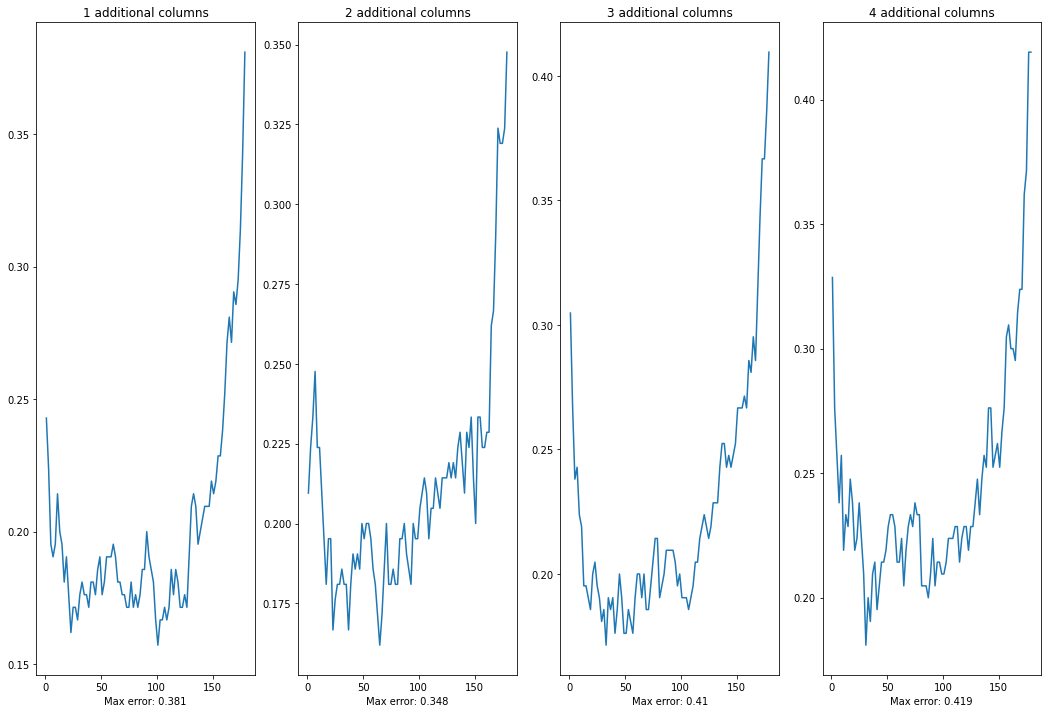

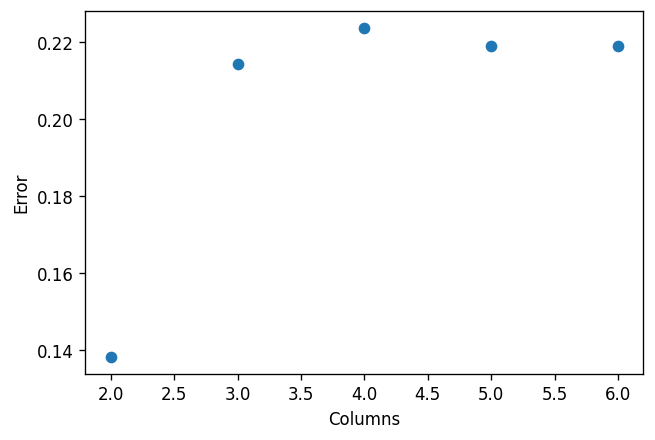

In [66]:

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(18, 12), sharex='all')
fig = plt.figure(dpi=120)
k_list = [k for k in range(1,179+1,2)]
for i in range(4):
    error_holder = []
    for k in k_list:
        error_holder.append(run_kNN(X_new[:,:3+i],y,nf,k))
    ax[i].plot(k_list,error_holder)
    max_error = round(max(error_holder),3)
    ax[i].set_title(f'{i+1} additional columns')
    ax[i].set_xlabel(f'Max error: {max_error}')
    

cols = [2,3,4,5,6]   
error_holder_k11 = []
for i in cols:
    error_holder_k11.append(run_kNN(X_new[:,:i],y,nf,11))

plt.xlabel('Columns')
plt.ylabel('Error')
plt.scatter(cols,error_holder_k11)
plt.show()

